In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargando los datos y dándoles una mirada

In [2]:
df = pd.read_csv('tennis_stats.csv')

In [3]:
print(df.columns)

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')


## Identifiquemos las columnas del dataset
`Player`: nombre del jugador <br>
`Year`: año de la observación
## Columnas de saque (Ofensivas)
`Aces`: número de saques del jugador que el receptor no toca la pelota <br>
`DoubleFaults`: nro de veces que el jugador falló ambos, primer y segundo saque <br>
`FirstServe`: % de primeros saques realizados <br>
`FirstServePointsWon`: % de puntos ganados con el primer saque del jugador <br>
`SecondServePointsWon`: % de puntos ganados con el segundo saque del jugador <br>
`BreakPointsFaced`: nro de veces que el que recibe estuvo a un punto de ganarle el game de saque al jugador <br>
`BreakPointsSaved`: % de las veces que el jugador pudo detener al que recibe de ganar su game de saque cuando tenían la oportunidad <br>
`ServiceGamesPlayed`: nro total de games que se jugaron mientras el jugador sacaba <br>
`ServiceGamesWon`: nro total de games ganados en el que el jugador sacó <br>
`TotalServicePointsWon`: % de puntos en games donde el jugador sacaba, que se ganaron <br>
## Columnas de devolución (Defensivas)
`FirstServeReturnPointsWon`: % de puntos con primeros saques del oponentes que el jugador pudo ganar<br>
`SecondServeReturnPointsWon`: % de puntos con segundos saques del oponentes que el jugador pudo ganar<br>
`BreakPointsOpportunities`: nro de veces que el jugador pudo haberle ganado el game de saque al oponente <br>
`BreakPointsConverted`: % de las veces que el jugador efectivamente le ganó el game de saque al oponente <br>
`ReturnGamesPlayed`: nro total de games que tuvo que devolver el saque del oponente<br>
`ReturnGamesWon`: nro total de games donde el oponente del jugador sacaba y el jugador ganó<br>
`ReturnPointsWon`: nro total de puntos ganados por el jugador mientras que el oponente sacaba <br>
`TotalPointsWon`: % de puntos ganados por el jugador <br>
## Outcomes
`Wins`: nro de partidos ganados en un año <br>
`Losses`: nro de partidos perdidos en un año <br>
`Winnings`: ganancias en USD($) en un año <br>
`Ranking`: ranking al final del año <br>

In [4]:
print(df.dtypes)
#todas son números con excepcion del nombre del jugador

Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object


# Análisis de Datos Exploratorio

<AxesSubplot:>

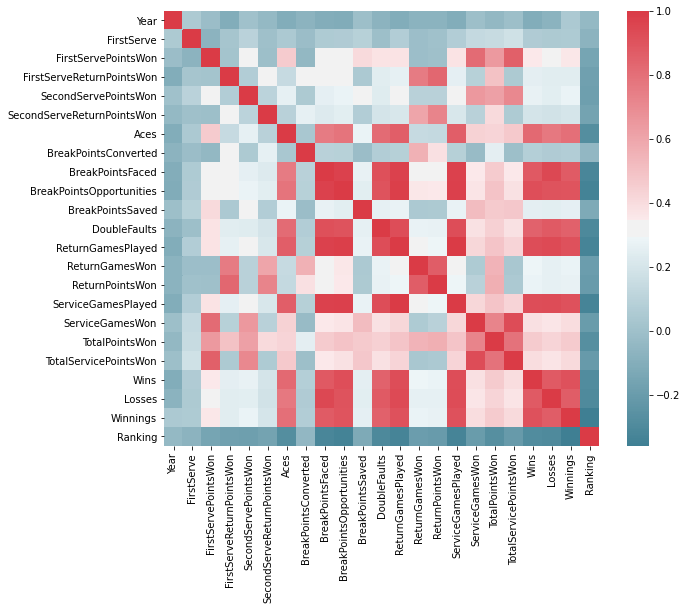

In [5]:
#matriz de correlación
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)